## Work
1. 試比較 save_best_only 與否的差異
2. 請僅存入將 save_weights_only 設定為 True, 並嘗試 reset ipynb 並將模型與權重重新建回並預測 x_test

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [2]:
from keras.datasets import cifar10
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
from keras.utils import np_utils
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = np_utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import BatchNormalization

"""
建立神經網路，並加入 BN layer
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 1024
MOMENTUM = 0.95


In [8]:
# 載入 Callbacks
"""Code Here
設定 callbacks: model checkpoint
"""
import tensorflow as tf 
from keras.callbacks import ModelCheckpoint

model_ckpt_T = ModelCheckpoint(filepath="./tmp.h5", 
                             monitor="val_loss", 
                             save_best_only=True)

model_ckpt_F = ModelCheckpoint(filepath="./tmp.h5", 
                             monitor="val_loss", 
                             save_best_only=False)


MODEL_CHECK = [model_ckpt_T, model_ckpt_F]

results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
i = 0 
for Modckpt in MODEL_CHECK:
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = tf.keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True,
              callbacks=[Modckpt]
             )

    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    if i == 0:
        name_tag = 'True'
    else:
        name_tag = 'False'
    
    # Load back
    model = keras.models.load_model("./tmp.h5")
    loss_loadback, acc_loadback = model.evaluate(x_test, y_test)
    results[name_tag] = {'train-loss': train_loss,
                        'valid-loss': valid_loss,
                        'train-acc': train_acc,
                        'valid-acc': valid_acc,
                        'loss_loadback': loss_loadback,
                        'acc_loadback': acc_loadback}
    i+=1

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 3072)]            0         
                                                                 
 hidden_layer1 (Dense)       (None, 512)               1573376   
                                                                 
 batch_normalization_3 (Batc  (None, 512)              2048      
 hNormalization)                                                 
                                                                 
 hidden_layer2 (Dense)       (None, 256)               131328    
                                                                 
 batch_normalization_4 (Batc  (None, 256)              1024      
 hNormalization)                                                 
                                                                 
 hidden_layer3 (Dense)       (None, 128)               3289

C:\1_220107_Anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/50
49/49 [==============================] - 8s 133ms/step - loss: 2.2142 - accuracy: 0.2664 - val_loss: 2.1031 - val_accuracy: 0.2144
Epoch 2/50
49/49 [==============================] - 5s 108ms/step - loss: 1.7506 - accuracy: 0.3928 - val_loss: 1.9548 - val_accuracy: 0.3116
Epoch 3/50
49/49 [==============================] - 5s 106ms/step - loss: 1.6243 - accuracy: 0.4328 - val_loss: 1.8404 - val_accuracy: 0.3579
Epoch 4/50
49/49 [==============================] - 5s 104ms/step - loss: 1.5504 - accuracy: 0.4600 - val_loss: 1.7325 - val_accuracy: 0.3967
Epoch 5/50
49/49 [==============================] - 5s 106ms/step - loss: 1.4935 - accuracy: 0.4813 - val_loss: 1.6540 - val_accuracy: 0.4242
Epoch 6/50
49/49 [==============================] - 5s 105ms/step - loss: 1.4491 - accuracy: 0.4960 - val_loss: 1.5867 - val_accuracy: 0.4509
Epoch 7/50
49/49 [==============================] - 5s 105ms/step - loss: 1.4097 - accuracy: 0.5091 - val_loss: 1.5526 - val_accuracy: 0.4567
Epoch 

 hidden_layer3 (Dense)       (None, 128)               32896     
                                                                 
 batch_normalization_8 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 output (Dense)              (None, 10)                1290      
                                                                 
Total params: 1,742,474
Trainable params: 1,740,682
Non-trainable params: 1,792
_________________________________________________________________
Epoch 1/50
49/49 [==============================] - 6s 114ms/step - loss: 2.2121 - accuracy: 0.2708 - val_loss: 2.1580 - val_accuracy: 0.1880
Epoch 2/50
49/49 [==============================] - 5s 105ms/step - loss: 1.7477 - accuracy: 0.3897 - val_loss: 1.9930 - val_accuracy: 0.2773
Epoch 3/50
49/49 [==============================] - 5s 104ms/step - loss: 1.6212 - accuracy: 0.4322 - val_lo

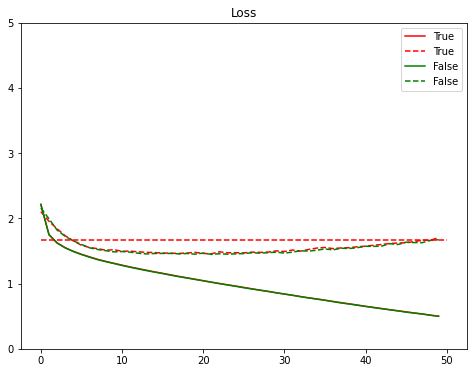

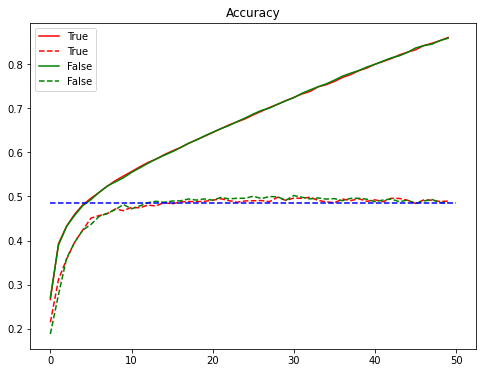

In [9]:
"""Code Here
將結果繪出
"""
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
    
plt.hlines(y=results[cond]['loss_loadback'], xmin=0, xmax=len(train_loss), colors='r', linestyles='--')
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.hlines(y=results[cond]['acc_loadback'], xmin=0, xmax=len(train_loss), colors='b', linestyles='--')
plt.title("Accuracy")
plt.legend()
plt.show()